In [1]:
import sympy
from sympy import *


In [2]:
init_printing(use_unicode=False, wrap_line=False)
x = Symbol('x')
u = Symbol('u')
v = Symbol('v')

In [ ]:
leaky_relu_x = Piecewise((0.01*x,x<0),(x, x>=0))
relu_x = Piecewise((0,x<0),(x, x>=0))

In [ ]:
y = (1/(v * sqrt(2*pi)))*exp(-(x - u)**2/(2 *v**2))  * x**4
sympy.simplify(integrate(y, (x, 0, +oo)))
# integrate((1/(sqrt(2*pi)))*exp(-(x - u)**2/(2)), (x, -oo, +oo))
# y = integrate(exp(-(x - u)**2/v**2), (x, 0, oo))
# print(y)

In [ ]:
y = (1/(v * sqrt(2*pi)))*exp(-(x - u)**2/(2 *v**2)) * x**4
z = simplify(integrate(y, (x, -oo, +oo)))
print(z)

In [ ]:
Piecewise((-u*erfc(sqrt(2)*u/(2*v))/2 + u + sqrt(2)*v*exp(-u**2/(2*v**2))/(2*sqrt(pi)), (Abs(arg(v)) < pi/4) | ((Abs(arg(v)) <= pi/4) & (Abs(2*arg(u) - 4*arg(v) + 2*pi) < pi))), (sqrt(2)*Integral(x*exp(-(u - x)**2/(2*v**2)), (x, 0, oo))/(2*sqrt(pi)*v), True))

In [ ]:
u = 0
v = 1

In [3]:
c_0_p = 1 - erfc(sqrt(2)*u/(2*v))/2
c_0_a = 1
c_1_p = -u*erfc(sqrt(2)*u/(2*v))/2 + u + sqrt(2)*v*exp(-u**2/(2*v**2))/(2*sqrt(pi))
c_1_a = u
c_2_p = -u**2*erfc(sqrt(2)*u/(2*v))/2 + u**2 + sqrt(2)*u*v*exp(-u**2/(2*v**2))/(2*sqrt(pi)) - v**2*erfc(sqrt(2)*u/(2*v))/2 + v**2
c_2_a = u**2 + v**2
c_3_p = (sqrt(2)*u**2*v + sqrt(pi)*u*(-u**2*erfc(sqrt(2)*u/(2*v)) + 2*u**2 - 3*v**2*erfc(sqrt(2)*u/(2*v)) + 6*v**2)*exp(u**2/(2*v**2)) + 2*sqrt(2)*v**3)*exp(-u**2/(2*v**2))/(2*sqrt(pi))
c_3_a = u*(u**2 + 3*v**2)

c_4_p = (sqrt(2)*u**3*v + 5*sqrt(2)*u*v**3 + sqrt(pi)*(-u**4*erfc(sqrt(2)*u/(2*v)) + 2*u**4 - 6*u**2*v**2*erfc(sqrt(2)*u/(2*v)) + 12*u**2*v**2 - 3*v**4*erfc(sqrt(2)*u/(2*v)) + 6*v**4)*exp(u**2/(2*v**2)))*exp(-u**2/(2*v**2))/(2*sqrt(pi))
c_4_a = u**4 + 6*u**2*v**2 + 3*v**4

In [ ]:
# sympy.expand(c_4_a)
# sympy.simplify(c_4_a)

In [ ]:
print(c_4_p.evalf())

In [4]:
w2 = Symbol('w2')
w1 = Symbol('w1')
w0 = Symbol('w0')

In [6]:
loss = c_2_p + c_4_a * w2**2 + 2*c_3_a*w1*w2 + c_2_a * (2*w2*w0 + w1**2) + 2 * c_1_a * w0 * w1 + w0**2 - 2*c_3_p*w2 - 2*c_2_p*w1 - 2*c_1_p*w0
# loss

In [7]:
loss.diff(w2)

In [8]:
loss.diff(w1)

In [9]:
loss.diff(w0)

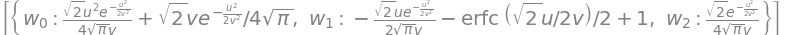

In [15]:
solve([loss.diff(w2), loss.diff(w1), loss.diff(w0)], [w2, w1, w0], dict=True) #, set=True

In [1]:
from approx import *

In [28]:
print(approx_4rd(0.5, 1)[0])
print(approx_4rd_loss(0.5, 1))

-0.01100204146138436
0.005275710859741295
